In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv')
submission=pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv')
submission_key=pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv')

In [5]:
df

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...
182333,C112,2018-12-27,22.0,15.9,27.9,0.0,NaN,100.0,13.2
182334,C112,2018-12-28,21.9,14.9,28.2,0.0,NaN,91.0,12.6
182335,C112,2018-12-29,22.4,16.3,28.2,0.0,NaN,61.0,14.2
182336,C112,2018-12-30,21.6,18.5,26.6,1.6,NaN,70.0,17.0


In [38]:
#let's first analyze a specific city
df1=df[df['city_id']=='C001']

In [28]:
df1

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...
1821,C001,2018-12-27,9.7,4.0,17.0,0.0,NaN,157.0,6.2
1822,C001,2018-12-28,10.1,5.7,17.0,0.0,NaN,188.0,5.2
1823,C001,2018-12-29,8.9,4.0,17.0,0.0,NaN,164.0,6.2
1824,C001,2018-12-30,10.7,5.0,18.0,0.0,NaN,160.0,8.1


In [30]:
df1.describe()

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
count,1826.000000,1824.000000,1823.000000,356.000000,0.0,1805.000000,1818.000000
mean,16.298905,10.091173,23.433736,2.619101,NaN,198.595568,7.785699
std,7.209946,7.041747,7.905163,8.926957,NaN,96.542159,2.778654
min,-1.600000,-9.500000,2.400000,0.000000,NaN,0.000000,2.400000
25%,10.600000,5.000000,17.000000,0.000000,NaN,148.000000,6.000000
50%,15.900000,10.000000,23.000000,0.000000,NaN,179.000000,7.100000
75%,22.900000,16.300000,30.100000,0.000000,NaN,294.000000,8.700000
max,30.100000,24.000000,41.000000,64.600000,NaN,358.000000,25.200000


In [39]:
df1['date'] = pd.to_datetime(df1['date'])
df1.set_index(['date'], inplace=True)

req_cols=['avg_temp_c']
df2=df1[req_cols]

In [34]:
df2

,avg_temp_c
date,
2014-01-01,6.6
2014-01-02,9.3
2014-01-03,7.6
2014-01-04,7.6
2014-01-05,8.6
...,...
2018-12-27,9.7
2018-12-28,10.1
2018-12-29,8.9


Due to the high percentage of missing values in snow_depth_mm, precipitation_mm , remove them from the further analysis.

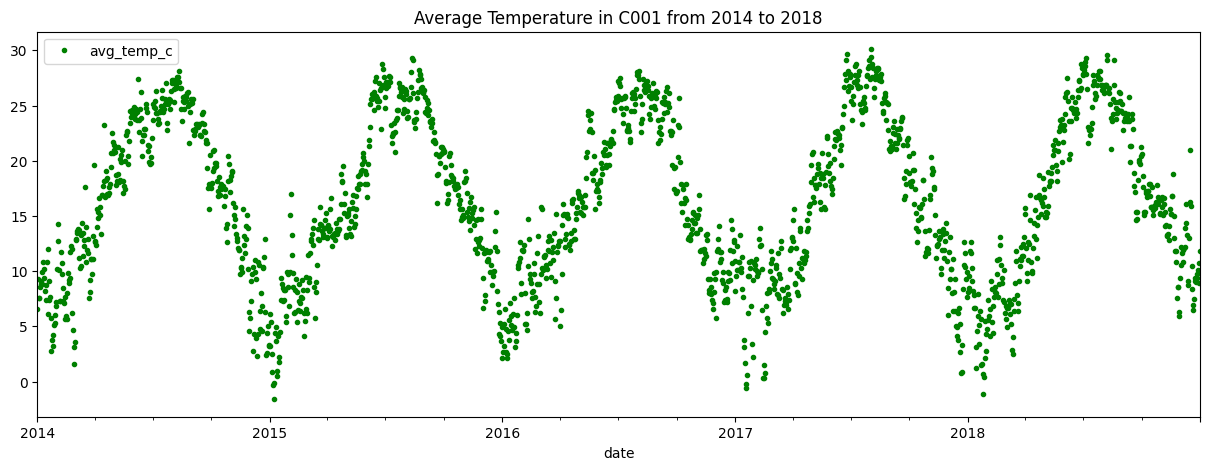

In [58]:
df2.plot(style='.',
        figsize=(15, 5),
        color='g',
        title='Average Temperature in C001 from 2014 to 2018')
plt.show()

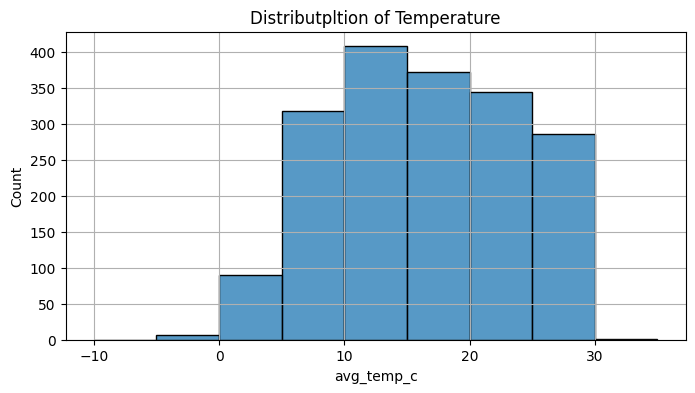

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df2.avg_temp_c, bins=[i for i in range (-10,40,5)],kde=False)
plt.title('Distributpltion of Temperature')
plt.grid()
plt.show()

Most of the temperature values lie from 5 to 25 Celcius

In [40]:
df2.isna().sum()

avg_temp_c    0
dtype: int64

In [43]:
#To achieve best accuracy normalize data uing min-max scaler
#sequence_length=10 means it take all the past 10 days values and then predict the 11th day temperature

from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(df2.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][0]  # 'avg_temp' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (1452, 10, 1)
Train Y shape: (1452,)
Test X shape: (364, 10, 1)
Test Y shape: (364,)


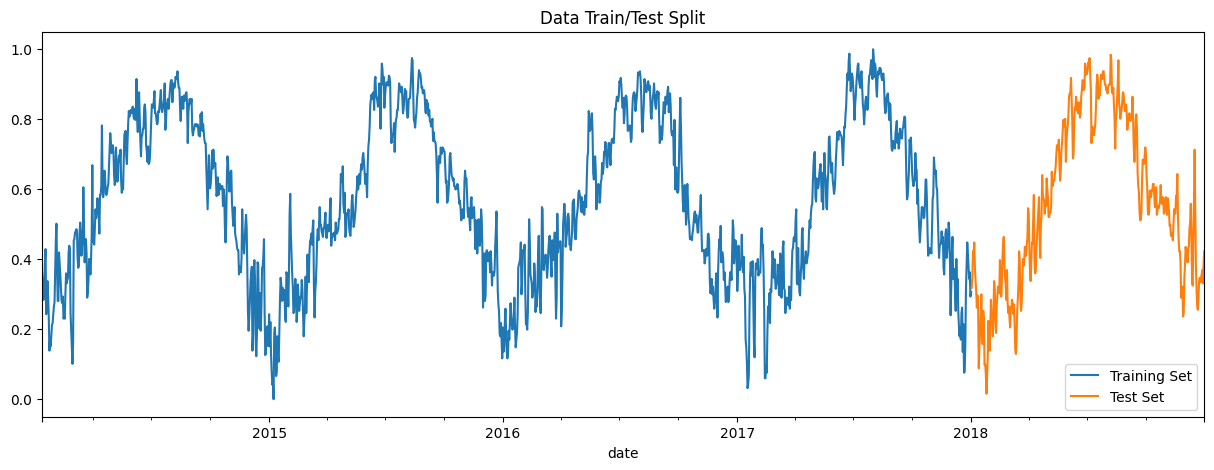

In [62]:
train_dates = df2.index[:len(train_x) + sequence_length]
test_dates = df2.index[len(train_x) + sequence_length:]

train = pd.DataFrame(train_y, index=train_dates[sequence_length:], columns=['avg_temp'])
test = pd.DataFrame(test_y, index=test_dates, columns=['avg_temp'])

# Plot train/test split
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
#ax.axvline('2015-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [64]:
df2.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

2024-06-24 20:03:42.206947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 20:03:42.207107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 20:03:42.362110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,417 (501.63 KB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/kaggle/working/best_model_weights.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.1772 - val_loss: 0.0310
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0211 - val_loss: 0.0154
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0164 - val_loss: 0.0117
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0136 - val_loss: 0.0085
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139 - val_loss: 0.0087
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0123 - val_loss: 0.0080
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0115 - val_loss: 0.0086
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0121 - val_loss: 0.0087
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0126 - val_loss: 0.0079
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0109 - val_loss: 0.0082
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0115 - val_loss: 0.0079
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

In [48]:
import tensorflow as tf
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('/kaggle/working/best_model_weights.keras')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 
Test Loss: 0.00267989793792367


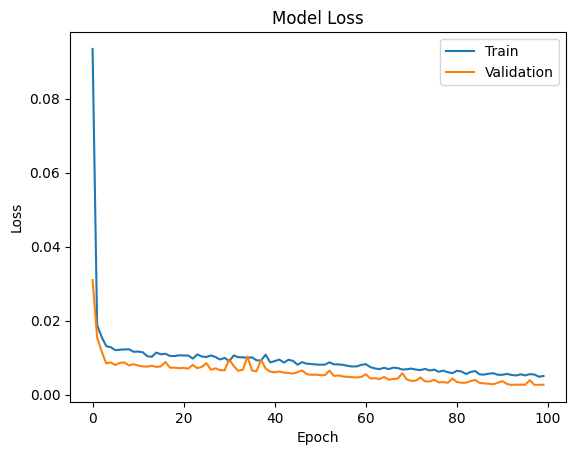

In [49]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Mean Absolute Error (MAE): 0.039593248139835314
Mean Squared Error (MSE): 0.002679897987632745
Root Mean Squared Error (RMSE): 0.051767731142409026


In [51]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 1, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


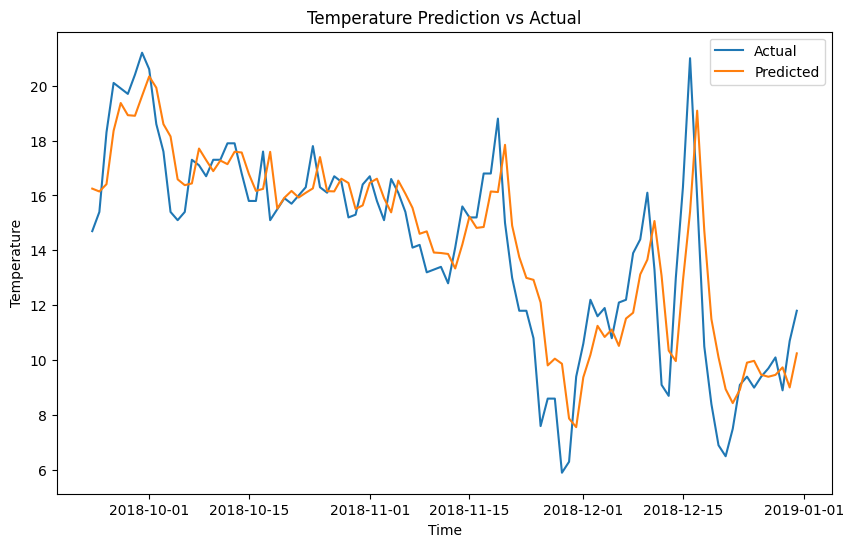

In [55]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df2.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df2.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()